In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

### Read CSV File

In [2]:
df = pd.read_csv(r'food.csv')
df

,Unnamed: 0,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,media,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags
0,0,https://twitter.com/nashikchicken/status/15920...,2022-11-14 08:14:11+00:00,We at Nashik Chicken only provide and promote ...,We at Nashik Chicken only provide and promote ...,1592068363265904641,"{'username': 'nashikchicken', 'id': 1288355206...",0,0,0,...,[{'previewUrl': 'https://pbs.twimg.com/media/F...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['food', 'chicken', 'nashikfood', 'nashikchick...",NaN
1,1,https://twitter.com/WNutrion/status/1592068333...,2022-11-14 08:14:04+00:00,Chocolate quinoa breakfast bowl\n\nhttps://t.c...,Chocolate quinoa breakfast bowl\n\nwellnutriti...,1592068333587025920,"{'username': 'WNutrion', 'id': 154974197772546...",0,0,0,...,[{'previewUrl': 'https://pbs.twimg.com/media/F...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['foodlover', 'delicious', 'foodies', 'SuperFo...",NaN
2,2,https://twitter.com/researchbook/status/159206...,2022-11-14 08:14:00+00:00,#Foodservice is defined as the value of all #f...,#Foodservice is defined as the value of all #f...,1592068318344904704,"{'username': 'researchbook', 'id': 343861732, ...",0,0,0,...,[{'previewUrl': 'https://pbs.twimg.com/media/F...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['Foodservice', 'food', 'drink']",NaN
3,3,https://twitter.com/hibi_tubu_/status/15920682...,2022-11-14 08:13:41+00:00,妹が考案したコストコのパンで揚げパン作った✌🏻\nみんなも試してみて😚\n\n#コストコ ...,妹が考案したコストコのパンで揚げパン作った✌🏻\nみんなも試してみて😚\n\n#コストコ ...,1592068238330187776,"{'username': 'hibi_tubu_', 'id': 1514864671073...",0,0,0,...,[{'previewUrl': 'https://pbs.twimg.com/media/F...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['コストコ', 'コストコのパン', 'food']",NaN
4,4,https://twitter.com/News18lokmat/status/159206...,2022-11-14 08:13:40+00:00,मुंबईत वेफर्स पाव हा एक भन्नाट पदार्थ मिळतो. य...,मुंबईत वेफर्स पाव हा एक भन्नाट पदार्थ मिळतो. य...,1592068233263476741,"{'username': 'News18lokmat', 'id': 190284083, ...",0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['Food', 'Mumbai', 'Local18', 'News18Lokmat', ...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,https://twitter.com/PallaviJaiswal0/status/159...,2022-11-14 07:29:31+00:00,Garlic Dhokla -- Got this packed for lunch :) ...,Garlic Dhokla -- Got this packed for lunch :) ...,1592057120782192640,"{'username': 'PallaviJaiswal0', 'id': 13660863...",4,2,19,...,[{'previewUrl': 'https://pbs.twimg.com/media/F...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['Monday', 'food', 'Gujarat', 'dhokla']",NaN
96,96,https://twitter.com/KermisPk/status/1592057084...,2022-11-14 07:29:22+00:00,Grilled Chicken Wraps Will make your your day!...,Grilled Chicken Wraps Will make your your day!...,1592057084081999872,"{'username': 'KermisPk', 'id': 156963557943607...",0,0,0,...,[{'previewUrl': 'https://pbs.twimg.com/media/F...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['kermis', 'foodie', 'food', 'fastfoodlife', '...",NaN
97,97,https://twitter.com/PragNews/status/1592056944...,2022-11-14 07:28:49+00:00,চেনি বা মিঠাই নহয়! ডায়েবেটিছ ৰোগৰ বাবে বিহ এ...,চেনি বা মিঠাই নহয়! ডায়েবেটিছ ৰোগৰ বাবে বিহ এ...,1592056944889843712,"{'username': 'PragNews', 'id': 776063255198388...",0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['diabetes', 'health', 'healthcare', 'food', '...",NaN
98,98,https://twitter.com/spaguyguy/status/159205646...,2022-11-14 07:26:55+00:00,Exercise is important as Food. You can do it a...,Exercise is important as Food. You can do it a...,1592056469322887168,"{'username': 'spaguyguy', 'id': 861302821, 'di...",0,0,1,...,[{'previewUrl': 'https://pbs.twimg.com/media/F...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['excercise', 'excerciseequipment', 'supplemen...",NaN


In [3]:
df.columns

Index(['Unnamed: 0', 'url', 'date', 'content', 'renderedContent', 'id', 'user',
       'replyCount', 'retweetCount', 'likeCount', 'quoteCount',
       'conversationId', 'lang', 'source', 'sourceUrl', 'sourceLabel',
       'outlinks', 'tcooutlinks', 'media', 'retweetedTweet', 'quotedTweet',
       'inReplyToTweetId', 'inReplyToUser', 'mentionedUsers', 'coordinates',
       'place', 'hashtags', 'cashtags'],
      dtype='object')

In [4]:
new_df = df.drop(['Unnamed: 0', 'url', 'date', 'renderedContent', 'id', 'conversationId', 'source', 'sourceUrl', 'sourceLabel', 'outlinks', 'tcooutlinks', 'media', 'retweetedTweet', 'quotedTweet', 'inReplyToTweetId', 'inReplyToUser', 'mentionedUsers', 'coordinates', 'place', 'cashtags'], axis='columns')
new_df.head()

,content,user,replyCount,retweetCount,likeCount,quoteCount,lang,hashtags
0,We at Nashik Chicken only provide and promote ...,"{'username': 'nashikchicken', 'id': 1288355206...",0,0,0,0,en,"['food', 'chicken', 'nashikfood', 'nashikchick..."
1,Chocolate quinoa breakfast bowl\n\nhttps://t.c...,"{'username': 'WNutrion', 'id': 154974197772546...",0,0,0,0,en,"['foodlover', 'delicious', 'foodies', 'SuperFo..."
2,#Foodservice is defined as the value of all #f...,"{'username': 'researchbook', 'id': 343861732, ...",0,0,0,0,en,"['Foodservice', 'food', 'drink']"
3,妹が考案したコストコのパンで揚げパン作った✌🏻\nみんなも試してみて😚\n\n#コストコ ...,"{'username': 'hibi_tubu_', 'id': 1514864671073...",0,0,0,0,ja,"['コストコ', 'コストコのパン', 'food']"
4,मुंबईत वेफर्स पाव हा एक भन्नाट पदार्थ मिळतो. य...,"{'username': 'News18lokmat', 'id': 190284083, ...",0,0,0,0,mr,"['Food', 'Mumbai', 'Local18', 'News18Lokmat', ..."


In [5]:
new_df.to_csv('Main_CSV_File.csv', index=False)

### Find Top 5 Related HashTags

In [5]:
hashtag = new_df['hashtags']
all_hashtags = []

for a in hashtag:
    a = a.replace('[', '')
    a = a.replace(']', '')
    a = a.replace("'", '')
    a = a.replace(' ', '')
    a = a.split(',')
    print(a)
    print(type(a))
    all_hashtags.append(a)

['food', 'chicken', 'nashikfood', 'nashikchicken']
<class 'list'>
['foodlover', 'delicious', 'foodies', 'SuperFoods', 'foodtrends', 'GoodEats', 'recipe', 'homemade', 'Cooking', 'different_recipes', 'bonappetit', 'appetit', 'tastefood', 'food', 'goodeat', 'dinner', 'healthyfood', 'healthyeating', 'vegetarian', 'diet']
<class 'list'>
['Foodservice', 'food', 'drink']
<class 'list'>
['コストコ', 'コストコのパン', 'food']
<class 'list'>
['Food', 'Mumbai', 'Local18', 'News18Lokmat', 'MarathiNews']
<class 'list'>
['RecipeOfTheDay', 'Food']
<class 'list'>
['Lunch', 'food', 'village']
<class 'list'>
['Christmas', 'cupcakes', 'food', 'photography', 'foodpanda1111']
<class 'list'>
['rice', 'food', 'japan', 'japanesefood', 'vine', 'cute', 'cooljapan']
<class 'list'>
['recette', 'recettes', 'recettecuisine', 'recettescuisine', 'recettefacile', 'food']
<class 'list'>
['food', 'plantbased', 'protein', 'meat', 'eggs', 'vegan', 'veganism', 'vegetarian', 'shrimp', 'chicken', 'beef', 'pork', 'tuna', 'life', 'health

In [6]:
all_hashtags

[['food', 'chicken', 'nashikfood', 'nashikchicken'],
 ['foodlover',
  'delicious',
  'foodies',
  'SuperFoods',
  'foodtrends',
  'GoodEats',
  'recipe',
  'homemade',
  'Cooking',
  'different_recipes',
  'bonappetit',
  'appetit',
  'tastefood',
  'food',
  'goodeat',
  'dinner',
  'healthyfood',
  'healthyeating',
  'vegetarian',
  'diet'],
 ['Foodservice', 'food', 'drink'],
 ['コストコ', 'コストコのパン', 'food'],
 ['Food', 'Mumbai', 'Local18', 'News18Lokmat', 'MarathiNews'],
 ['RecipeOfTheDay', 'Food'],
 ['Lunch', 'food', 'village'],
 ['Christmas', 'cupcakes', 'food', 'photography', 'foodpanda1111'],
 ['rice', 'food', 'japan', 'japanesefood', 'vine', 'cute', 'cooljapan'],
 ['recette',
  'recettes',
  'recettecuisine',
  'recettescuisine',
  'recettefacile',
  'food'],
 ['food',
  'plantbased',
  'protein',
  'meat',
  'eggs',
  'vegan',
  'veganism',
  'vegetarian',
  'shrimp',
  'chicken',
  'beef',
  'pork',
  'tuna',
  'life',
  'health',
  'MeetTheMeatless',
  'sustainability',
  'startu

In [7]:
my_dict = {}
for sublist in all_hashtags:
    for item in sublist:
        if item not in my_dict:
            my_dict[item] = 0
        my_dict[item] += 1
my_dict

{'food': 85,
 'chicken': 2,
 'nashikfood': 1,
 'nashikchicken': 1,
 'foodlover': 1,
 'delicious': 5,
 'foodies': 1,
 'SuperFoods': 1,
 'foodtrends': 1,
 'GoodEats': 1,
 'recipe': 3,
 'homemade': 2,
 'Cooking': 1,
 'different_recipes': 1,
 'bonappetit': 1,
 'appetit': 1,
 'tastefood': 1,
 'goodeat': 1,
 'dinner': 2,
 'healthyfood': 4,
 'healthyeating': 2,
 'vegetarian': 2,
 'diet': 5,
 'Foodservice': 1,
 'drink': 2,
 'コストコ': 1,
 'コストコのパン': 1,
 'Food': 15,
 'Mumbai': 1,
 'Local18': 1,
 'News18Lokmat': 1,
 'MarathiNews': 1,
 'RecipeOfTheDay': 2,
 'Lunch': 1,
 'village': 1,
 'Christmas': 1,
 'cupcakes': 1,
 'photography': 1,
 'foodpanda1111': 1,
 'rice': 1,
 'japan': 2,
 'japanesefood': 3,
 'vine': 1,
 'cute': 1,
 'cooljapan': 1,
 'recette': 1,
 'recettes': 1,
 'recettecuisine': 1,
 'recettescuisine': 1,
 'recettefacile': 1,
 'plantbased': 1,
 'protein': 4,
 'meat': 1,
 'eggs': 2,
 'vegan': 1,
 'veganism': 1,
 'shrimp': 1,
 'beef': 2,
 'pork': 1,
 'tuna': 1,
 'life': 5,
 'health': 7,
 'Mee

In [8]:
my_dict = sorted(my_dict.items(), key=lambda x:x[1], reverse=True)
my_dict

[('food', 85),
 ('Food', 15),
 ('foodstagram', 8),
 ('foodie', 8),
 ('health', 7),
 ('yummy', 7),
 ('delicious', 5),
 ('diet', 5),
 ('life', 5),
 ('invest', 5),
 ('healthyfood', 4),
 ('protein', 4),
 ('yum', 4),
 ('ChildrensDay', 4),
 ('trending', 4),
 ('facts', 4),
 ('media', 4),
 ('goals', 4),
 ('economy', 4),
 ('climate', 4),
 ('business', 4),
 ('career', 4),
 ('podcast', 4),
 ('Home', 4),
 ('recipe', 3),
 ('japanesefood', 3),
 ('cooking', 3),
 ('fingerfood', 3),
 ('cateringwedding', 3),
 ('halalcatering', 3),
 ('appetizers', 3),
 ('cater', 3),
 ('cateringevent', 3),
 ('cathering', 3),
 ('foodiesofinstagram', 3),
 ('eats', 3),
 ('instacool', 3),
 ('instafood', 3),
 ('supplements', 3),
 ('foodblogger', 3),
 ('recipes', 3),
 ('healthy', 3),
 ('MarieGuimarPalace', 3),
 ('thaifood', 3),
 ('ลพบุรี', 3),
 ('lopburi', 3),
 ('chicken', 2),
 ('homemade', 2),
 ('dinner', 2),
 ('healthyeating', 2),
 ('vegetarian', 2),
 ('drink', 2),
 ('RecipeOfTheDay', 2),
 ('japan', 2),
 ('eggs', 2),
 ('beef'

In [9]:
tophash = my_dict[:6]
tophash

[('food', 85),
 ('Food', 15),
 ('foodstagram', 8),
 ('foodie', 8),
 ('health', 7),
 ('yummy', 7)]

### Find Sentiment of Each Tweet

In [10]:
import nltk
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


In [11]:
new_df['cleaned_content'] = new_df['content'].apply(clean)

In [12]:
new_df['cleaned_content']

0     nashik chicken provid promot chicken healthi y...
1     chocol quinoa breakfast bowlfoodlov delici foo...
2     foodservic defin valu food drink includ ontrad...
3     妹が考案したコストコのパンで揚げパン作った✌🏻みんなも試してみて😚コストコ   コストコのパ...
4     मुंबईत वेफर्स पाव हा एक भन्नाट पदार्थ मिळतो या...
                            ...                        
95    garlic dhokla  got pack lunch  khud ka dhyan k...
96    grill chicken wrap make day hurri    locat mai...
97    চেনি বা মিঠাই নহয় ডায়েবেটিছ ৰোগৰ বাবে বিহ এই...
98    exercis import food home way ive dont year sti...
99    timetoo mani thingsnow final overit time relax...
Name: cleaned_content, Length: 100, dtype: object

In [13]:
from textblob import TextBlob

def polarity(sen):
    pol = TextBlob(sen)
    return pol.sentiment.polarity

def convert_pol(pol):
    if pol>0:
        return 'Positive'
    elif pol<0:
        return 'Negative'
    elif pol==0:
        return 'Neutral'

new_df['Polarity'] = new_df['cleaned_content'].apply(polarity)
new_df['Sentiment'] = new_df['Polarity'].apply(convert_pol)

In [14]:
new_df['Sentiment']

0     Negative
1      Neutral
2     Negative
3      Neutral
4      Neutral
        ...   
95     Neutral
96    Positive
97     Neutral
98     Neutral
99     Neutral
Name: Sentiment, Length: 100, dtype: object

In [15]:
new_df['Sentiment'].value_counts()

Neutral     55
Positive    35
Negative    10
Name: Sentiment, dtype: int64

### Tweet Counts

In [16]:
replycount = sum(new_df['replyCount'])
replycount

10

In [17]:
retweetcount = sum(new_df['retweetCount'])
retweetcount

18

In [18]:
likecount = sum(new_df['likeCount'])
likecount

65

### Word Cloud

In [24]:
text = ''
for i in new_df.cleaned_content:
    text += i

In [25]:
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)

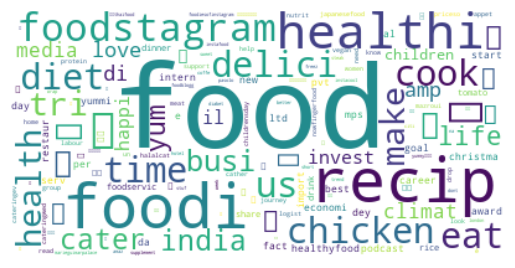

In [27]:
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()